In [1]:
import json
import base64
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import tensorflow as tf
import io
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import requests

# Test local deployment

In [2]:
data = {}
with open('test.png', mode='rb') as file:
    img = file.read()

data['img'] = base64.encodebytes(img).decode('utf-8')

query_json = json.dumps(data)

In [11]:
r = requests.post('http://127.0.0.255:5000/', data=query_json)
#r = requests.post('http://18.220.10.57:5000/', data=query_json, timeout=5)

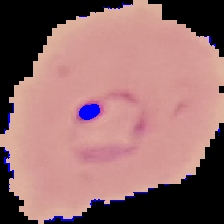

In [12]:
d = json.loads(r.content.decode())
thumbnail_bytes = base64.b64decode(d['img'])
with open(r'test_written.png', 'wb') as x:
    x.write(thumbnail_bytes)
# load it up
img_in = load_img("test_written.png",target_size=(224,224))
img_in

In [31]:
if not isinstance(query_json, dict):
    print('yes')
else:
    print('no')

yes


In [2]:
#data = {}
# img = Image.open("test.png")
# img = img_to_array(img)

data = {}
with open('test.png', mode='rb') as file:
    img = file.read()

data['img'] = base64.encodebytes(img).decode('utf-8')

query_json = json.dumps(data)

In [3]:
response_parsed = json.loads(query_json)

In [4]:
thumbnail_bytes = base64.b64decode(response_parsed['img'])

In [5]:
with open(r'test_written.png', 'wb') as x:
    x.write(thumbnail_bytes)

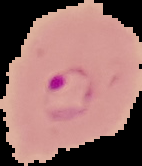

In [6]:
Image.open("test.png")

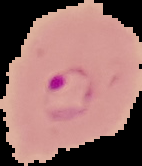

In [7]:
Image.open("test_written.png")

In [8]:
model = tf.keras.models.load_model('Model_001')

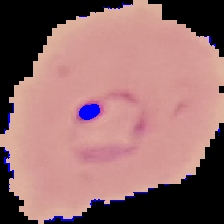

In [9]:
j = response_parsed

# define normalization
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
# get image
thumbnail_bytes = base64.b64decode(j['img'])
# write it to a file
with open(r'test_written.png', 'wb') as x:
    x.write(thumbnail_bytes)
# load it up
img_in = load_img("test_written.png",target_size=(224,224))
# create X input
input_arr = img_to_array(img_in)
input_arr = np.array([input_arr])  # Convert single image to a batch.
X = normalization_layer(input_arr)
# make the prediction
y_pred = model(X)
y_p = tf.keras.preprocessing.image.array_to_img(y_pred[0])

for x, y in np.argwhere(np.asarray(y_p) > 127):
    img_in.putpixel((y,x),(0,0,255))

img_in

In [53]:
img_in.save('stoopid.png')

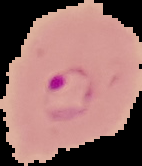

In [27]:
from array import array

def readimage(path):
#     count = os.stat(path).st_size / 2
    with open(path, "rb") as f:
        return bytearray(f.read())

bytes = readimage('test.png')


image = Image.open(io.BytesIO(bytes))
image
# Image.base64.b64decode(data['img'])

In [17]:
Image.frombytes('rgb', img)

TypeError: frombytes() missing 2 required positional arguments: 'size' and 'data'